In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',None)

In [ ]:
df = pd.read_csv('/content/Top Indian Places to Visit.csv')
df.head()

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Zone,0
State,0
City,0
Name,0
Type,0
Establishment Year,0
time needed to visit in hrs,0
Google review rating,0
Entrance Fee in INR,0


In [ ]:
df = df.drop(columns = ['Unnamed: 0','Zone','Establishment Year','Airport with 50km Radius','Weekly Off','Number of google review in lakhs'])
df.head()

,State,City,Name,Type,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Significance,DSLR Allowed,Best Time to visit
0,Delhi,Delhi,India Gate,War Memorial,0.5,4.6,0,Historical,Yes,Evening
1,Delhi,Delhi,Humayun's Tomb,Tomb,2.0,4.5,30,Historical,Yes,Afternoon
2,Delhi,Delhi,Akshardham Temple,Temple,5.0,4.6,60,Religious,No,Afternoon
3,Delhi,Delhi,Waste to Wonder Park,Theme Park,2.0,4.1,50,Environmental,Yes,Evening
4,Delhi,Delhi,Jantar Mantar,Observatory,2.0,4.2,15,Scientific,Yes,Morning


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = {}
for col in ['State', 'City', 'Significance', 'Best Time to visit']:
  le = LabelEncoder()
  df[col+'_enc'] = le.fit_transform(df[[col]])
  label_encoder[col] = le

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

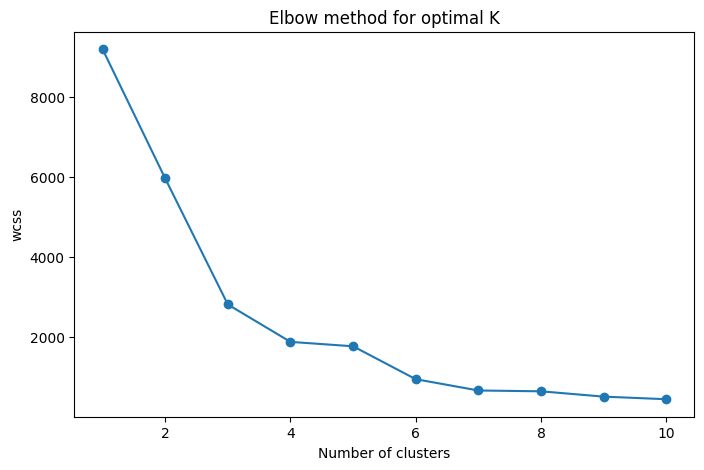

In [ ]:
from sklearn.cluster import KMeans

features = df[['Significance_enc', 'Best Time to visit_enc']]
wcss = []

for k in range(1,11):
  model = KMeans(n_clusters=k,init = 'k-means++',max_iter=300,random_state=42)
  model.fit(features)
  wcss.append(model.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow method for optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6,init = 'k-means++',max_iter=300,random_state=42)
kmeans.fit(features)
df['Cluster'] = kmeans.predict(features)

In [ ]:
def encode_input(state, city, significance, best_time):
    return [
        label_encoder['Significance'].transform([significance])[0],
        label_encoder['Best Time to visit'].transform([best_time])[0]
    ]

In [ ]:
def recommend_places(state, city, significance, best_time):

    user_input = np.array([encode_input(state, city, significance, best_time)])
    cluster = kmeans.predict(user_input)[0]

    # Filter by predicted cluster and user’s city
    results = df[(df['Cluster'] == cluster) & (df['City'] == city)]

    # Sort by review rating and show top 3
    return results.sort_values(by='Google review rating', ascending=False)[[
        'Name',
        'City',
        'Significance',
        'Best Time to visit',
        'Google review rating',
        'time needed to visit in hrs',
        'Entrance Fee in INR',
        'DSLR Allowed',
        'Type'  # still show it here
    ]]

In [ ]:
recommend_places(
    state='Maharashtra',
    city='Mumbai',
    significance='Religious',
    best_time='All'
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,Name,City,Significance,Best Time to visit,Google review rating,time needed to visit in hrs,Entrance Fee in INR,DSLR Allowed,Type
20,Siddhivinayak Temple,Mumbai,Religious,All,4.8,2.0,0,No,Temple
21,Mahalaxmi Temple,Mumbai,Religious,All,4.7,1.0,0,No,Temple
22,Haji Ali Dargah,Mumbai,Religious,All,4.4,2.0,0,No,Religious Shrine
24,Essel World,Mumbai,Recreational,All,4.3,5.0,1149,Yes,Amusement Park
